# Week 9: Edge Detection


### Date : 16th December, 2021

Last week you learned about edge detection algorithms and how these can be used to find
interesting features on an image that can be used in applications such as stereo matching,
3D reconstruction, tracking, localization and recognition.

In [89]:
import numpy as np
import copy
import cv2
from matplotlib import pyplot as plt
import random
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('fivethirtyeight')

## Task 1:

We would like to locate	the edges in the image as consistently and accurately as possible. Compute edge maps (i.e., follow the "Simple edge-detector" procedure from the lecture notes) for the image `lighthouse.png` using YOUR OWN:

a) Sobel edge detector (Sobel filters and thresholding)

b) Prewitt edge detector (Prewitt filters and thresholding)

c) An edge detector using derivative of Gaussian filtering in place of the Sobel/Prewitt kernels

d) The built-in Canny edge detector implemented in Matlab


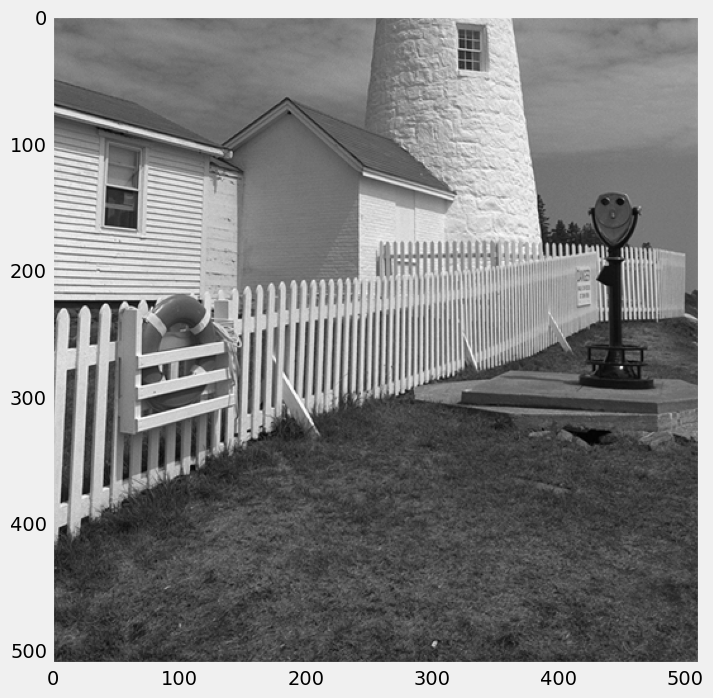

In [90]:
img = cv2.imread('../images/lighthouse.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
# Show original image
plt.figure(figsize=(8, 8))
plt.imshow(gray_img, "gray")
plt.grid(None)

In [91]:
# Implement your helper functions here. 
# Hint: you can use your implementations in lab week 6
def apply_filter(src_img, kernel):
    assert len(src_img.shape) == 2, print("Dimension mismatch! Please supply gray-scale image only!")
    assert len(kernel.shape) == 2, print("Dimension mismatch! Please supply 2D kernel only!")
    # code here
    H, W = src_img.shape
    h, w = kernel.shape
    rst_img = np.zeros((H, W))
    img = np.pad(src_img, ((h//2, h//2), (w//2, w//2)), 'edge')
    for i in range(H):
        for j in range(W):
            neighbors = img[i:i+h, j:j+w]
            rst_img[i][j] = np.sum(kernel * neighbors)
    return rst_img

def get_sobel_kernel():
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
    return Kx, Ky

def get_prewitt_kernel():
    Kx = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    Ky = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])
    return Kx, Ky

def get_gaussian_kernel(k, sigma):
    assert (k % 2 == 1), print("kernal size must be odd number!")
    # code here
    h_range = np.linspace(-k // 2, k // 2, k)
    w_range = np.linspace(-k // 2, k // 2, k)
    x, y = np.meshgrid(h_range, w_range)
    out_kernel = np.exp(-(x**2 + y**2)/(2 * sigma**2))
    out_kernel /= np.sum(out_kernel)
    
    return out_kernel

### 1.a. Sobel filter

In [92]:
# Sobel edge detector (Sobel filters and thresholding)
# code here
sobel_x, sobel_y = get_sobel_kernel()
filtered_x = apply_filter(gray_img, sobel_x)
filtered_y = apply_filter(gray_img, sobel_y)
G_sobel = np.sqrt(filtered_x**2 + filtered_y**2)
G = G_sobel

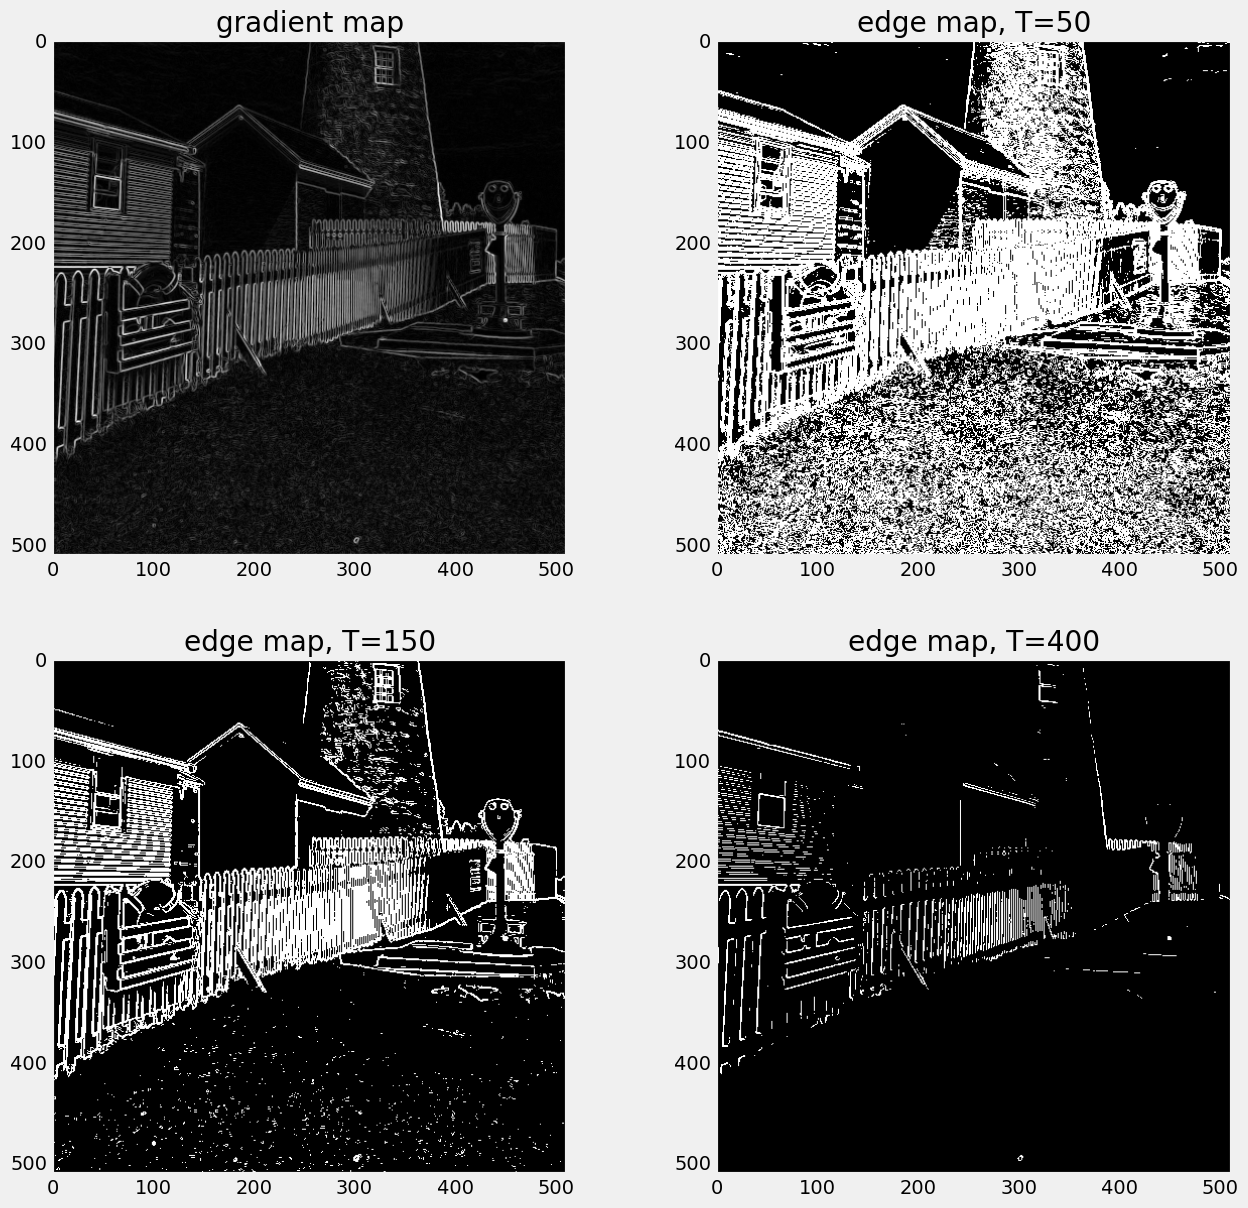

In [93]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_sobel, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.b. Prewitt filter

In [94]:
# Prewitt edge detector (Prewitt filters and thresholding)
# code here
sobel_x, sobel_y = get_prewitt_kernel()
filtered_x = apply_filter(gray_img, sobel_x)
filtered_y = apply_filter(gray_img, sobel_y)
G_prewitt = np.sqrt(filtered_x**2 + filtered_y**2)

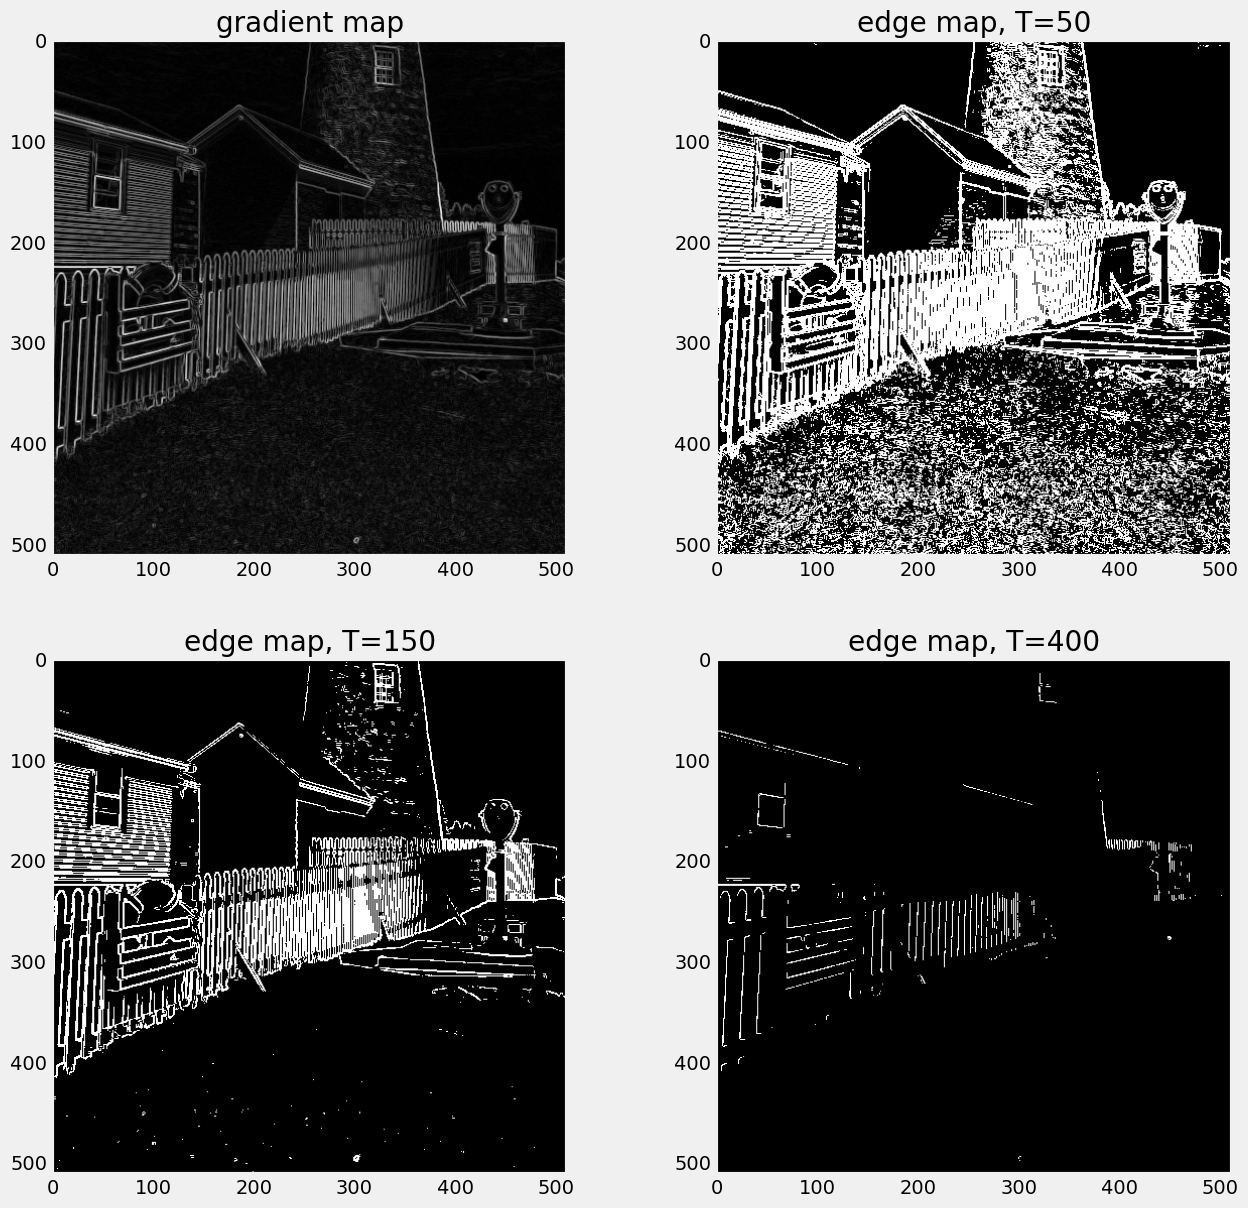

In [95]:
thresholds = [50, 150, 400]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map")
plt.imshow(G_prewitt, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_prewitt > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_prewitt > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_prewitt > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.c. Gaussian derivative

In [96]:
# first try gaussian kernel size=5, sigma=1.0
# code here
gaussian_kernel_1 = get_gaussian_kernel(5, 1.0)
G_gauss_1 = apply_filter(gray_img, gaussian_kernel_1)
Gx_gauss_1 = apply_filter(G_gauss_1, sobel_x)
Gy_gauss_1 = apply_filter(G_gauss_1, sobel_y)
G_gauss_1 = np.sqrt(Gx_gauss_1**2 + Gy_gauss_1**2)
# then try gaussian kernel size=5, sigma=5.0
#code here
gaussian_kernel_2 = get_gaussian_kernel(5, 5.0)
G_gauss_5 = apply_filter(gray_img, gaussian_kernel_2)
Gx_gauss_2 = apply_filter(G_gauss_5, sobel_x)
Gx_gauss_2 = apply_filter(G_gauss_5, sobel_y)
G_gauss_5 = np.sqrt(Gx_gauss_2**2 + Gx_gauss_2**2)

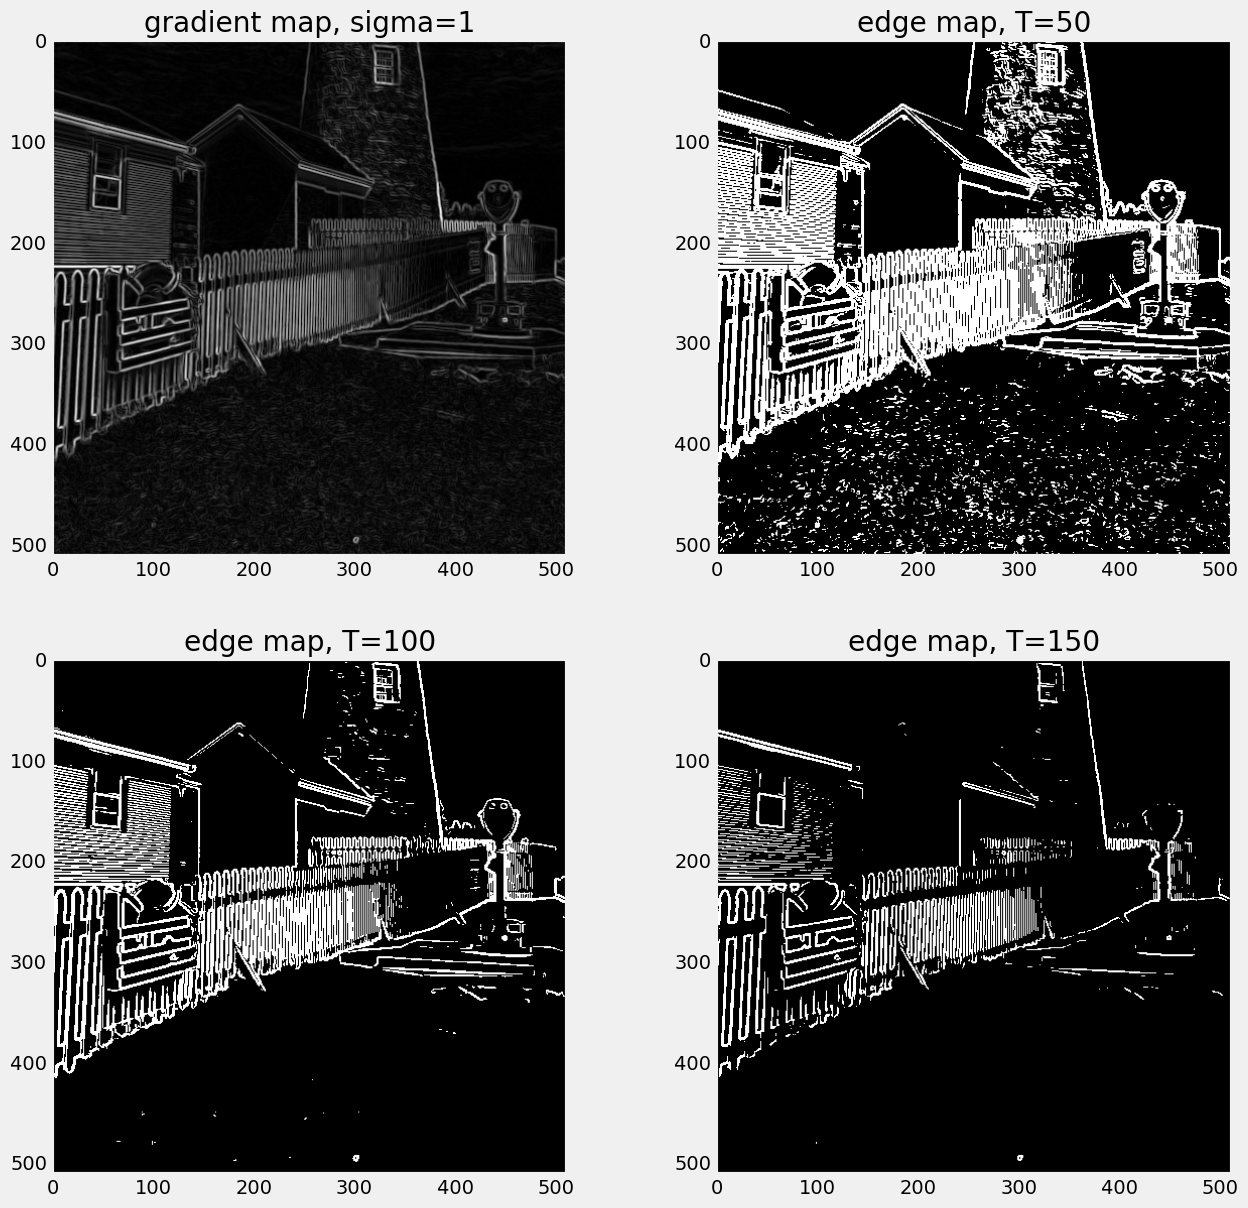

In [97]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=1")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_1 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_1 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_1 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

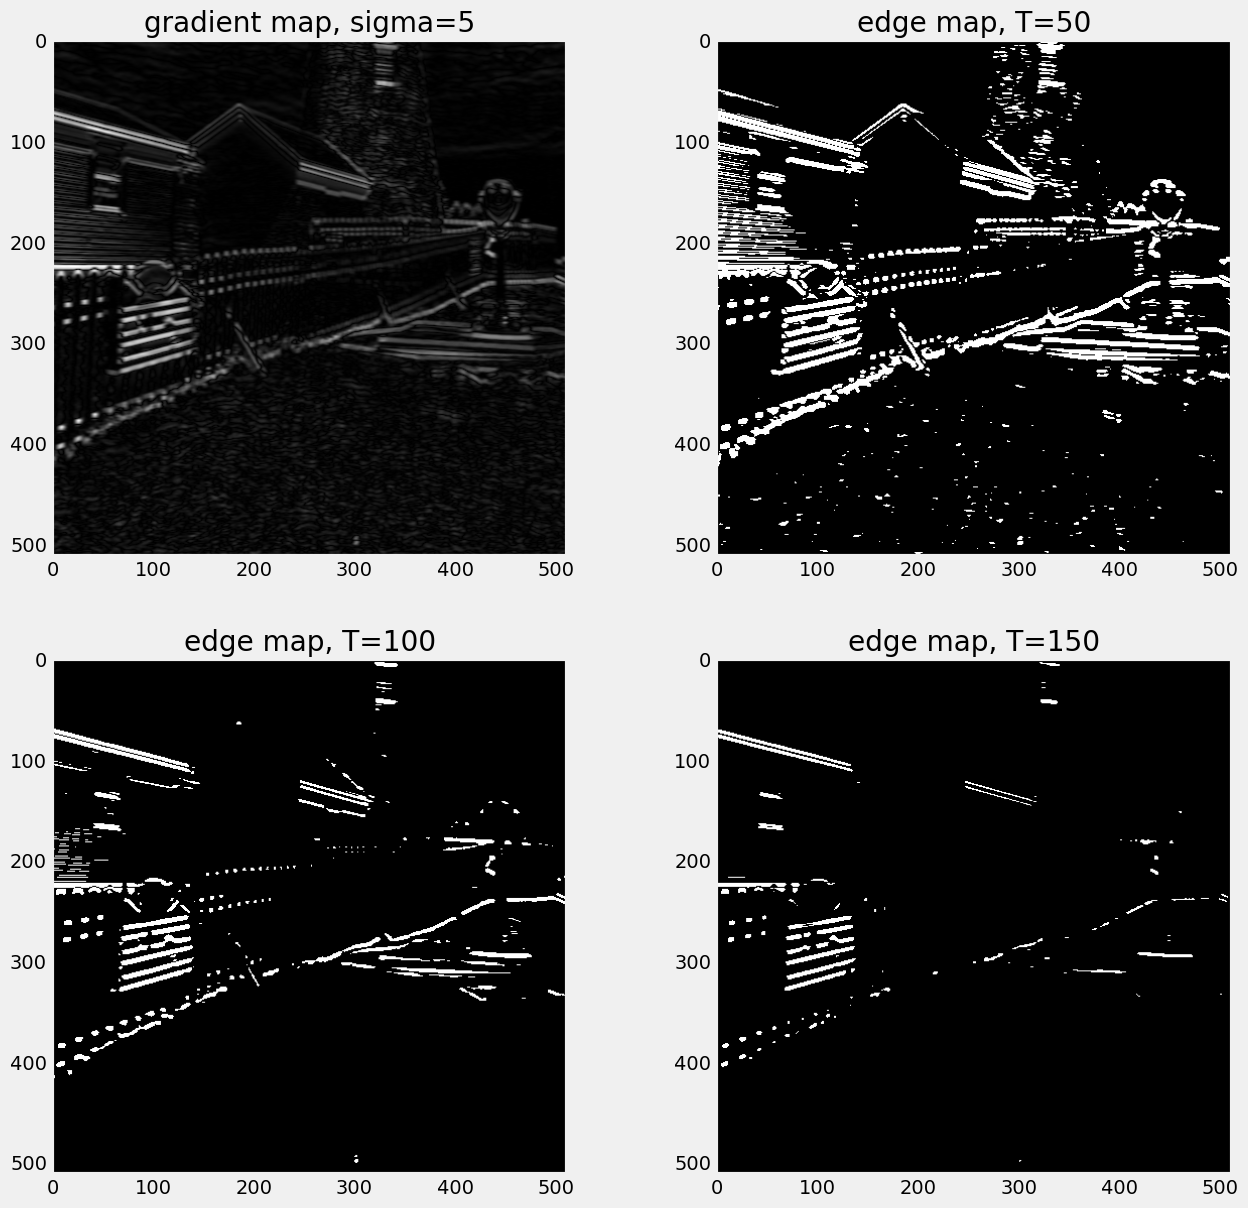

In [98]:
thresholds = [50, 100, 150]
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("gradient map, sigma=5")
plt.imshow(G_gauss_5, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("edge map, T={:d}".format(thresholds[0]))
plt.imshow((G_gauss_5 > thresholds[0]).astype(np.uint8), "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("edge map, T={:d}".format(thresholds[1]))
plt.imshow((G_gauss_5 > thresholds[1]).astype(np.uint8), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map, T={:d}".format(thresholds[2]))
plt.imshow((G_gauss_5 > thresholds[2]).astype(np.uint8), "gray")
plt.grid(None)

### 1.d. The built-in Canny edge detector in OpenCV
You will need to use cv2.Canny() function. Figure out how to use it yourself.

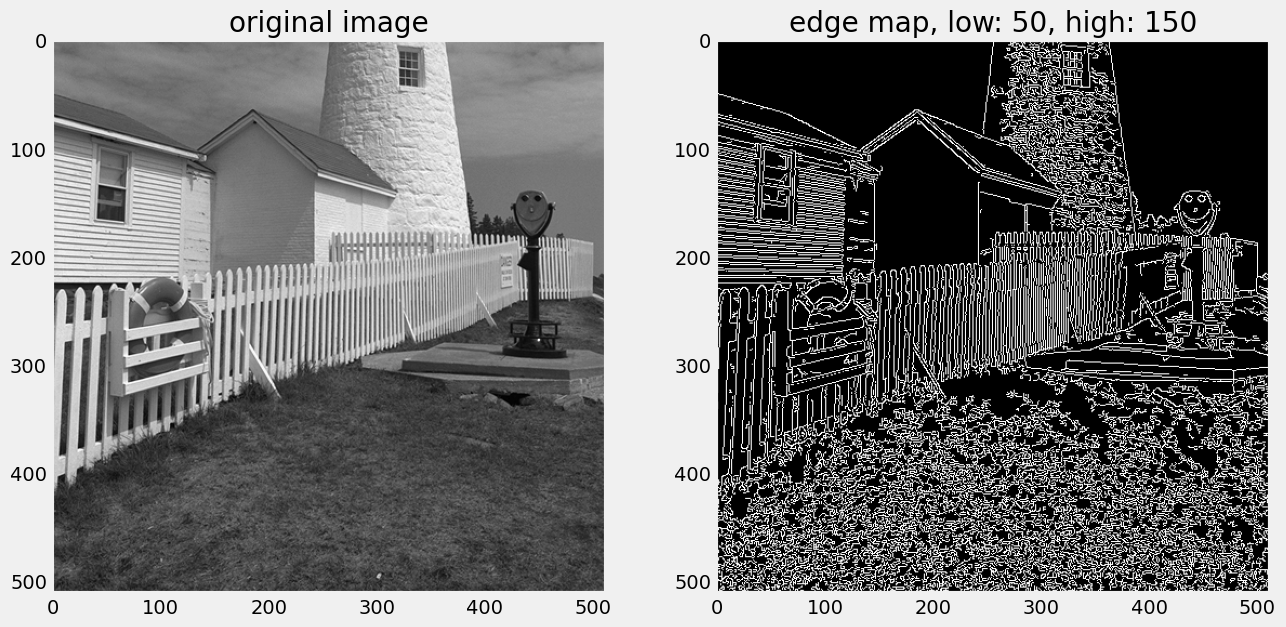

In [99]:
# code here
th_lo = 50
th_hi = 150
edges = cv2.Canny(gray_img.astype(np.uint8), th_lo, th_hi)

# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text("edge map, low: {:d}, high: {:d}".format(th_lo, th_hi))
plt.imshow(edges, "gray")
plt.grid(None)

## Task 2: Non-maximal suppression

Implement a non-maximal suppression algorithm and use it on the responses of the filters you used in c) above. Then using fft2 function	plot the phase and magnitude of the suppressed image for different suppression parameters (e.g., threshold or connectivity type). Comment on your findings.

Hint: You can round the gradient angle into 0, 45, 90 and 135 degrees and only check along those for directions.

hint: you may find the OpenCV doc helpful: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

In [107]:
# Implement your functions here
import copy

def non_maximal_supp(Gx, Gy, G):
    # Calculate gradient angles
    angles = np.arctan2(Gy, Gx) * (180 / np.pi)
    angles[angles < 0] += 180  # Convert angles to positive values [0, 180)

    H, W = G.shape
    out_gradients = np.zeros_like(G)

    for i in range(1, H - 1):
        for j in range(1, W - 1):
            angle = angles[i, j]

            # Horizontal edge
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbors = [G[i, j - 1], G[i, j + 1]]
            # Diagonal edge
            elif 22.5 <= angle < 67.5:
                neighbors = [G[i - 1, j - 1], G[i + 1, j + 1]]
            # Vertical edge
            elif 67.5 <= angle < 112.5:
                neighbors = [G[i - 1, j], G[i + 1, j]]
            # Diagonal edge
            elif 112.5 <= angle < 157.5:
                neighbors = [G[i - 1, j + 1], G[i + 1, j - 1]]

            if G[i, j] >= max(neighbors):
                out_gradients[i, j] = G[i, j]
                
    return out_gradients

def hyst_threshold(G, lo, hi, connectivity=3):
    # code here
    edges = cv2.Canny(G.astype(np.uint8), lo, hi, L2gradient=True, apertureSize=connectivity)
    return edges

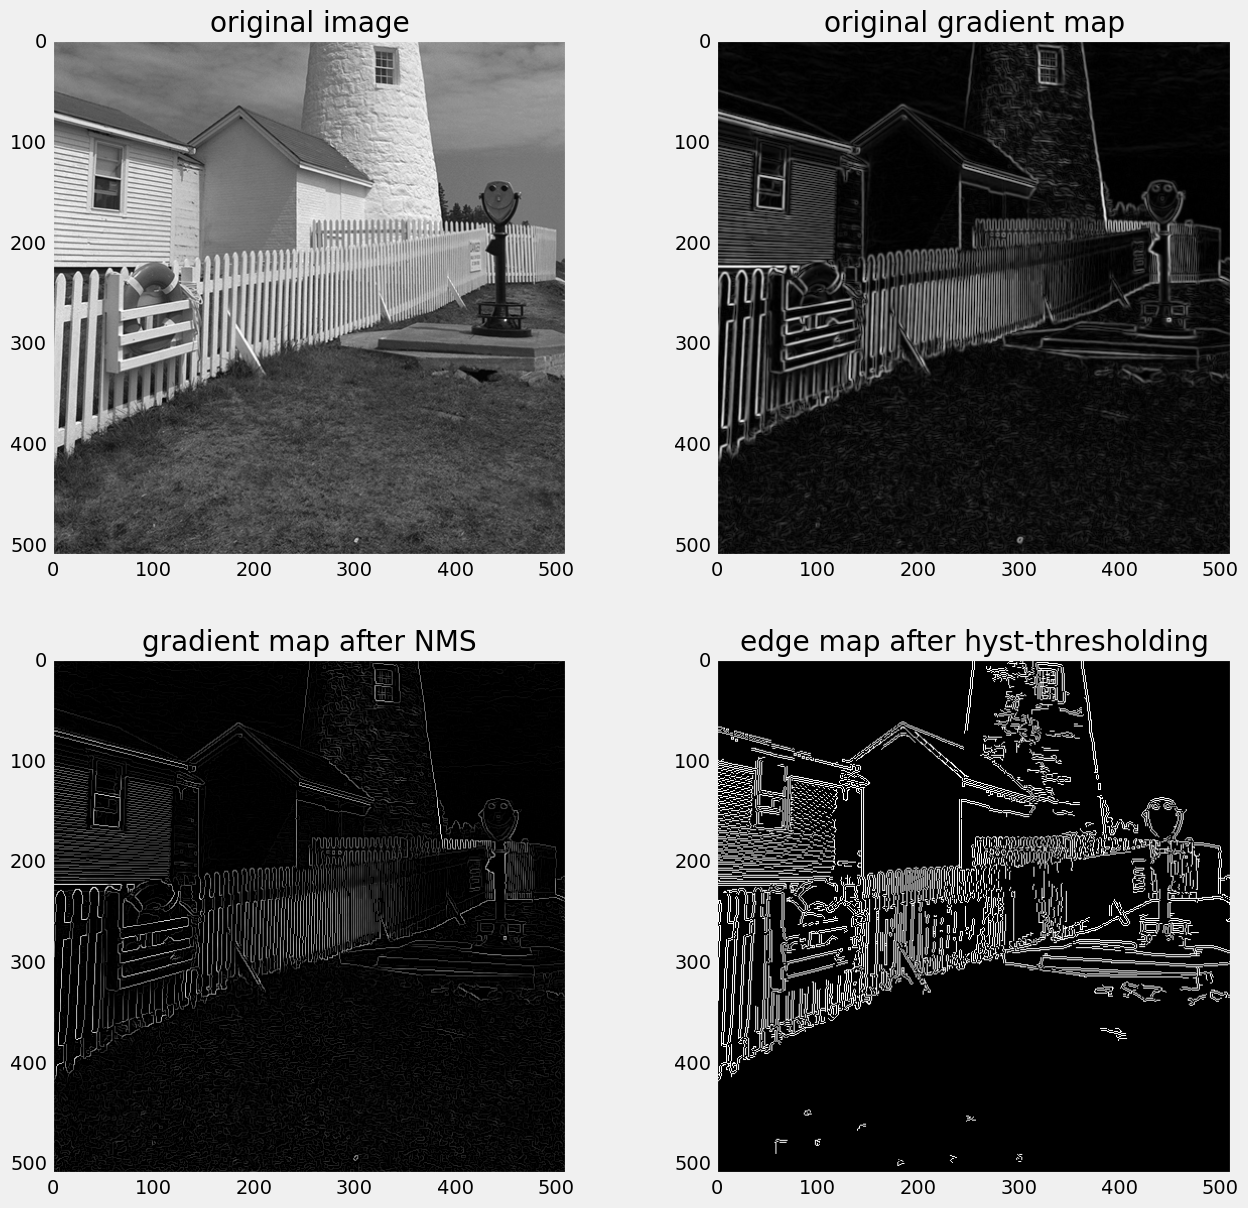

In [108]:
G_nm = non_maximal_supp(Gx_gauss_1, Gy_gauss_1, G_gauss_1)
edge_map = hyst_threshold(G_nm, 150, 400)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("original image")
plt.imshow(gray_img, "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("original gradient map")
plt.imshow(G_gauss_1, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("gradient map after NMS")
plt.imshow(G_nm, "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("edge map after hyst-thresholding")
plt.imshow(edge_map, "gray")
plt.grid(None)

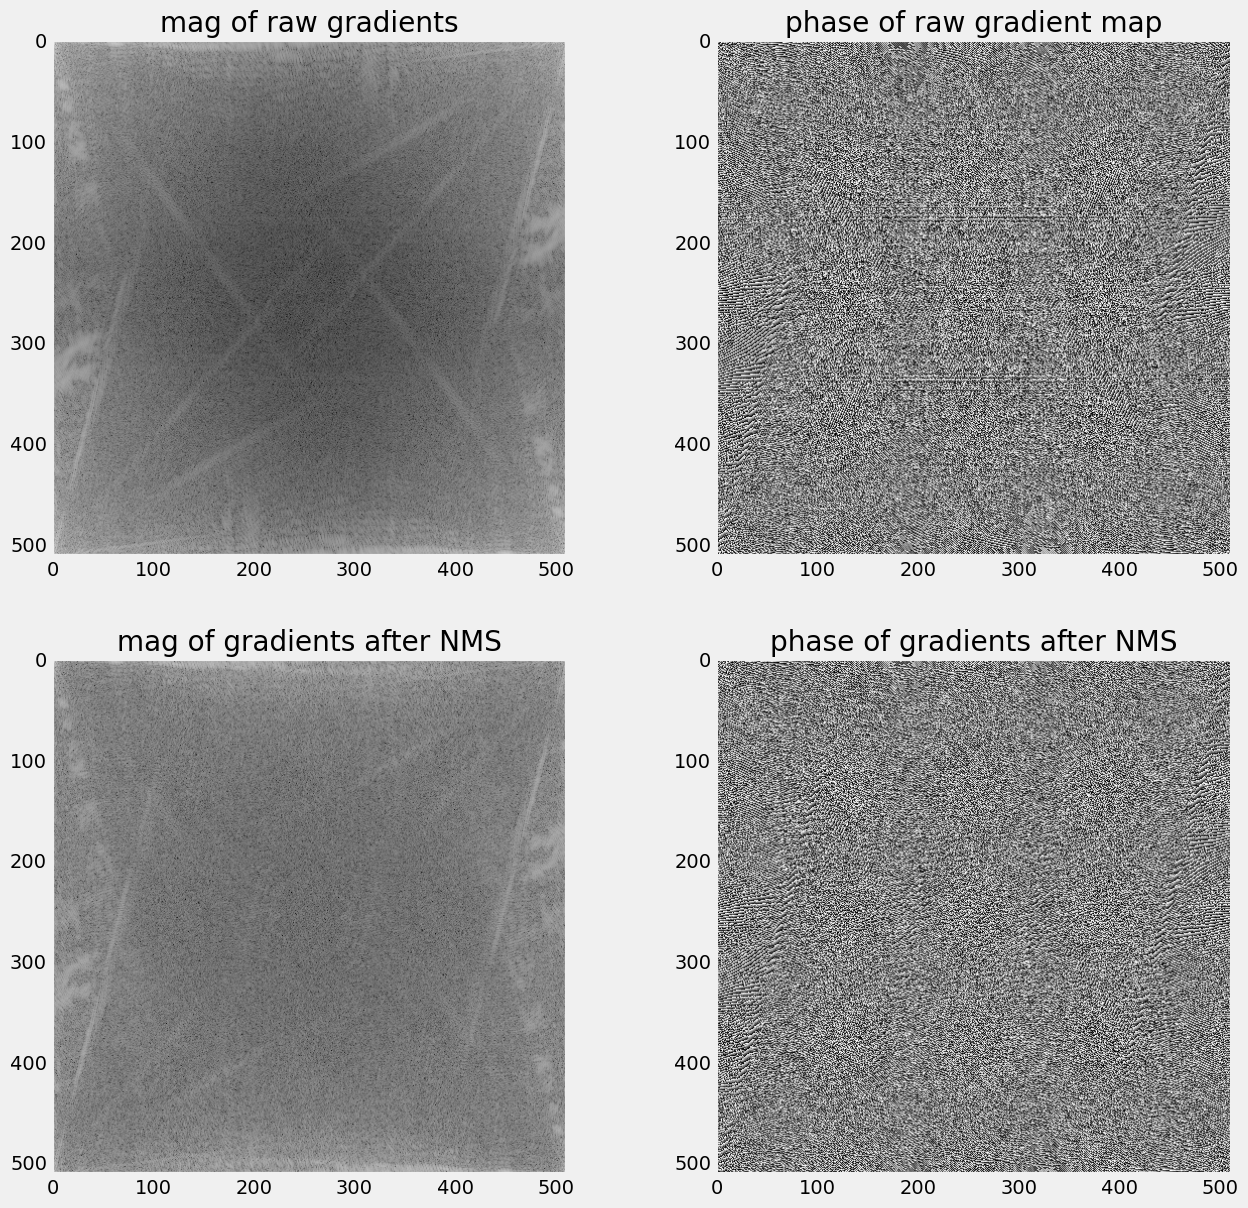

In [102]:
fft_G = np.fft.fft2(G_gauss_1)
G_mag = np.abs(fft_G)
G_phase = np.angle(fft_G)
fft_G_nm = np.fft.fft2(G_nm)
G_nm_mag = np.abs(fft_G_nm)
G_nm_phase = np.angle(fft_G_nm)
# plot results
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2, 2, 1)
ax1.title.set_text("mag of raw gradients")
plt.imshow(np.log(G_mag), "gray")
plt.grid(None)
ax2 = plt.subplot(2, 2, 2)
ax2.title.set_text("phase of raw gradient map")
plt.imshow(G_phase, "gray")
plt.grid(None)
ax3 = plt.subplot(2, 2, 3)
ax3.title.set_text("mag of gradients after NMS")
plt.imshow(np.log(G_nm_mag), "gray")
plt.grid(None)
ax4 = plt.subplot(2, 2, 4)
ax4.title.set_text("phase of gradients after NMS")
plt.imshow(G_nm_phase, "gray")
plt.grid(None)